## Name of the Project :Loan Status_Prediction

### Business Problem :
The Banks want to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

### Description of the dataset:

Dataset has information about loan applicants data such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others

<b>File Format :</b>csv
    
<b>Rows :</b>614
    
<b>Columns :</b>13

<b>Target Variable :</b>Loan_Status

### Attribute Information :

<b>Loan_ID :</b> Unique Loan ID

<b>Gender :</b> Applicant's Gender (Male/ Female)

<b>Married :</b> Marital status((Y/N))

<b>Dependents  :</b> Number of dependents

<b>Education  :</b> Applicant Education (Graduate/ Under Graduate)

<b>ApplicantIncome   :</b> Applicant's Income 

<b>CoapplicantIncome  :</b> Coapplicant's Income 

<b>LoanAmount  :</b> Loan Amount in thousands

<b>Loan_Amount_Term  :</b> Term of loan in months
    
<b>Credit_History  :</b> Credit_History of applicant
    
<b>Property_Area   :</b> Urban/ Semi Urban/ Rural

<b>Loan_Status  :</b> lLoan approved (Y/N)
         

### Loan status prediction extra information :

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

<b>Salary </b>: Applicants with high income should have more chances of loan approval.

<b>Previous history</b>: Applicants who have repayed their previous debts should have higher chances of loan approval.

<b>Loan amount</b>: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

<b>Loan term</b>: Loan for less time period and less amount should have higher chances of approval.

<b>EMI</b>: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors

### Objective :

To build a model which predicts whether the applicant's loan will be approved or rejected.

### Constraints :
1.Acceptable with little latency.

2.Need good Exploratory Data Analysis.

### Type of Machine Learning Problem :

Binary Classification

### Performace Metrics :

Try with as many as possible metrics.

1.Accuracy

2.Confusion Matrix

3.Precision and Recall

4.F1 score

5.ROC curvers

6.AUC

### Train and Test Construction :
We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

### Let us start the model development!!

#### Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the data from csv :

In [3]:
data=pd.read_csv("D:\Projects\Loan_Status_Prediction/bank_loan.csv")

### Exploratory Data Analysis(EDA) :

In [4]:
# Shape of the dataframe

data.shape

(614, 13)

In [5]:
# showing the 1st 5 records of the dataframe

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Checking for Number of NaN values in each column:

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Observation : 
We can see that many of the columns have missing data.we will handle it in the Data Precessing section.

#### Checking the data types of the columns :

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Observation :
All columns have correct data types.But,2 cloumns(Loan_Amount_Term,Credit_History) have float which can be int also.

#### Checking for duplicate records :

In [8]:
data.duplicated().sum()

0

#### Observation :

There are no duplicate records in the dataset.

#### Checking the Target Class count of the dataset :

In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Observation :

The dataset is not heavily imbalanced.We can go ahead with the data as is.

#### Checking the unique values of the columns :

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

### Data Preprocessing :

#### Handling NaN values :

In [18]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Type converston from float to int :

In [23]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')
data['Credit_History']=data['Credit_History'].astype('int')

In [24]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int')

In [25]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

#### Handling invalid data :

In [26]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [27]:
data['Dependents'].replace('3+',3,inplace=True)

In [28]:
data['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [30]:
data['Dependents']=data['Dependents'].astype('int')

In [31]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y


## Data Visulaization :

['Y' 'N']


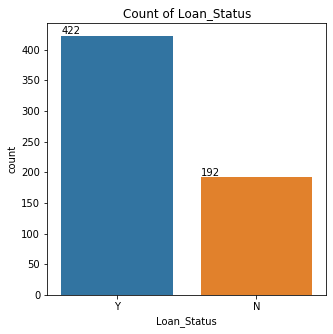

In [33]:
print(data['Loan_Status'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Loan_Status'])
ax.set_title("Count of Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

Loan Approved pepole :422
    
Loan Rejected people :192

['Male' 'Female']


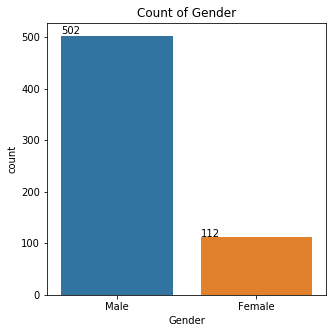

In [34]:
print(data['Gender'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'])
ax.set_title("Count of Gender")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :
There are 502 Male applicants and 112 Female applications.

['No' 'Yes']


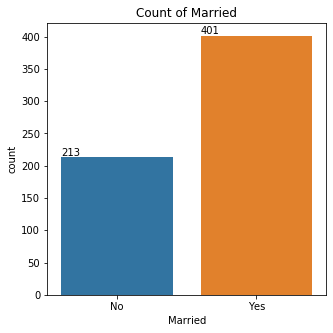

In [35]:
print(data['Married'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Married'])
ax.set_title("Count of Married")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

### Observation :

There are 213 unmarried and 401 married people.

[0 1 2 3]


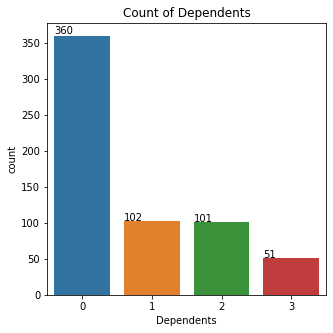

In [36]:
print(data['Dependents'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Dependents'])
ax.set_title("Count of Dependents")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :
Dependents '0' category is more than others categories.

['Graduate' 'Not Graduate']


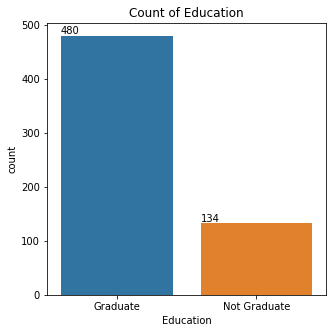

In [37]:
print(data['Education'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Education'])
ax.set_title("Count of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :
There are 480 graduate people and 134 ungraduate people.

['No' 'Yes']


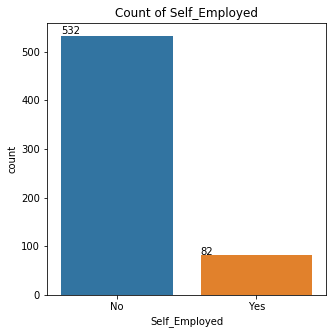

In [38]:
print(data['Self_Employed'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Self_Employed'])
ax.set_title("Count of Self_Employed")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :
532 people are not self employed and 82 people are self employed.

[360 120 240 180  60 300 480  36  84  12]


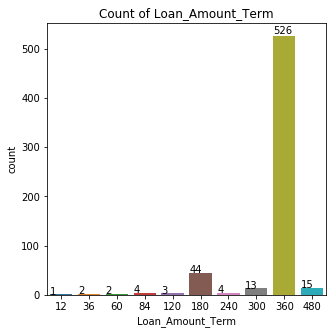

In [39]:
print(data['Loan_Amount_Term'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Loan_Amount_Term'])
ax.set_title("Count of Loan_Amount_Term")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

### Observation :

There are many people who opted for Term ; 360 than others.

[1 0]


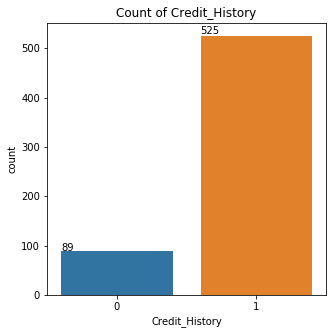

In [40]:
print(data['Credit_History'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Credit_History'])
ax.set_title("Count of Credit_History")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

There are 525 people who have credit history :1 and 89 people with credit history:0

['Urban' 'Rural' 'Semiurban']


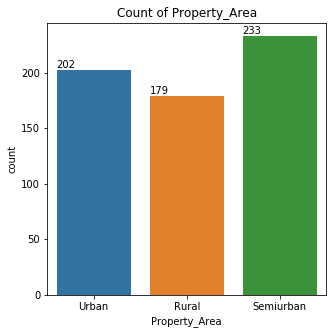

In [41]:
print(data['Property_Area'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Property_Area'])
ax.set_title("Count of Property_Area")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

There are almost many applicants in each category.

Male      502
Female    112
Name: Gender, dtype: int64


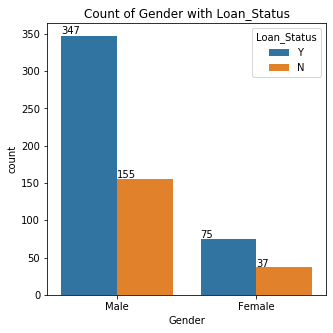

In [42]:
print(data['Gender'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'],hue=data['Loan_Status'])
ax.set_title("Count of Gender with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

Out of 502 males,347 applicants are Approved and 155 applicants are rejected.

Out of 112 females,75 applicants are Approved and 37 applicants are rejected.

Yes    401
No     213
Name: Married, dtype: int64


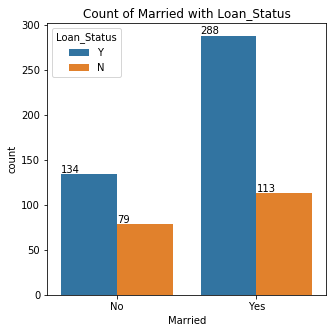

In [43]:
print(data['Married'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Married'],hue=data['Loan_Status'])
ax.set_title("Count of Married with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observations :
Out of 401 married,288 applicants are Approved and 113 applicants are rejected.

Out of 213 unmarried,134 applicants are Approved and 79 applicants are rejected.

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


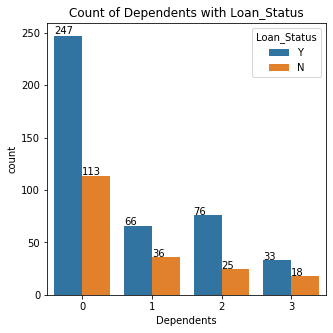

In [44]:
print(data['Dependents'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Dependents'],hue=data['Loan_Status'])
ax.set_title("Count of Dependents with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

There are many applicants whose loan approved is from "0" category than others.

There are many applicants whose loan rejected is from "0" catefory than others.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


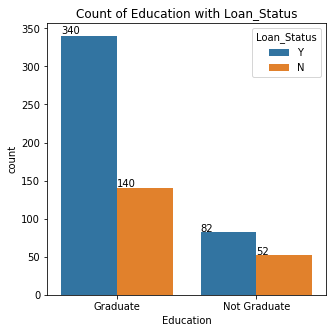

In [45]:
print(data['Education'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Education'],hue=data['Loan_Status'])
ax.set_title("Count of Education with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

Many applicants whose loan approved are Graduated and there are less people whose loan approved are ungraduated.

No     532
Yes     82
Name: Self_Employed, dtype: int64


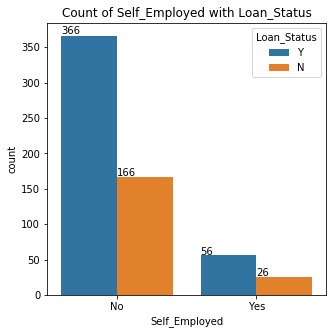

In [46]:
print(data['Self_Employed'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
ax.set_title("Count of Self_Employed with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observations :

Many applicants who are not self employed got the loan approved than the applicants who are self employed.

1    525
0     89
Name: Credit_History, dtype: int64


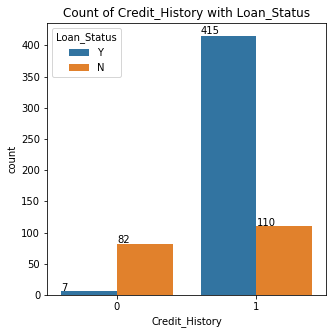

In [47]:
print(data['Credit_History'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
ax.set_title("Count of Credit_History with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

The applicants whose loan got approved are from Credit history :1 than others.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


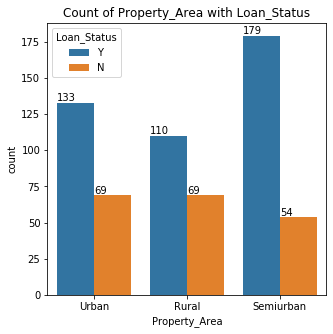

In [48]:
print(data['Property_Area'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
ax.set_title("Count of Property_Area with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Observation :

There are applicants whose loan approved and rejected from all three areas.

### Distributions of numerical features :

#### "ApplicantIncome" distribution :

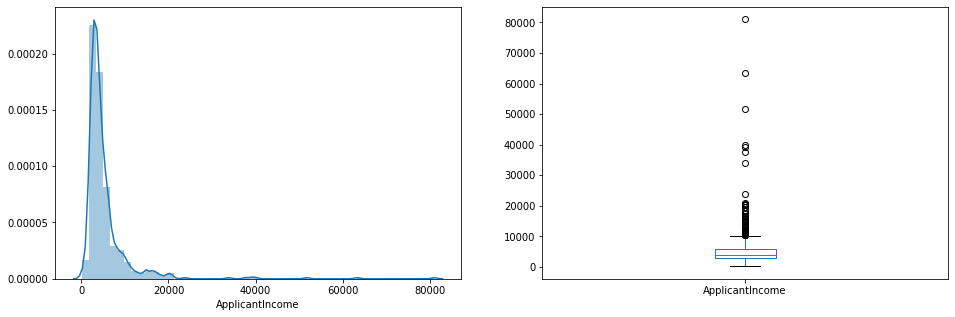

In [49]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["ApplicantIncome"]);

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#### Observation :

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

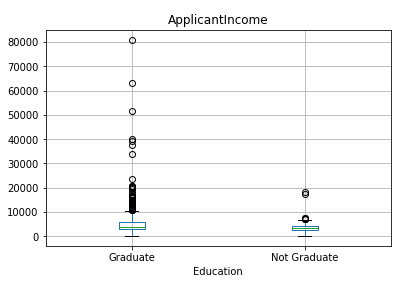

In [50]:
data.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

#### Observation :

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

#### "CoapplicantIncome" distribution:

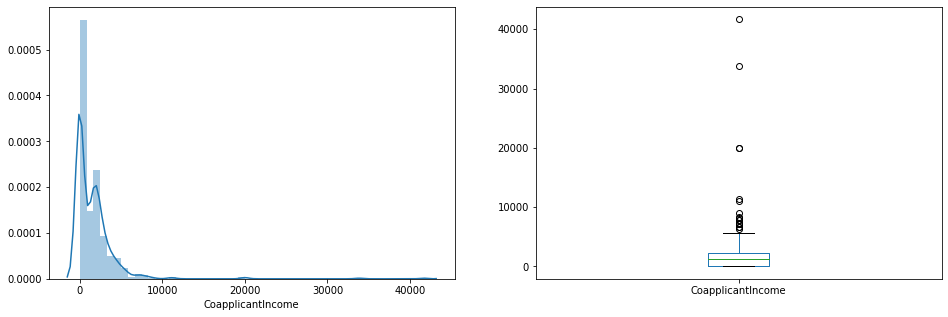

In [51]:
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"]);

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#### Obsevation :

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

#### "LoanAmount" distribution :

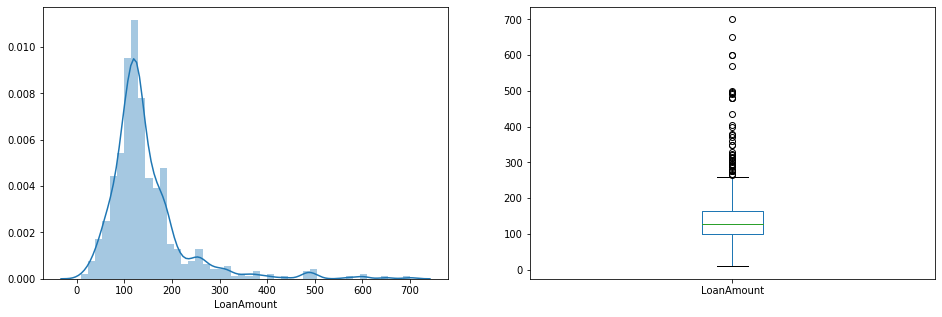

In [52]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

#### Observation :

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

#### LoanAmountTerm distribution :

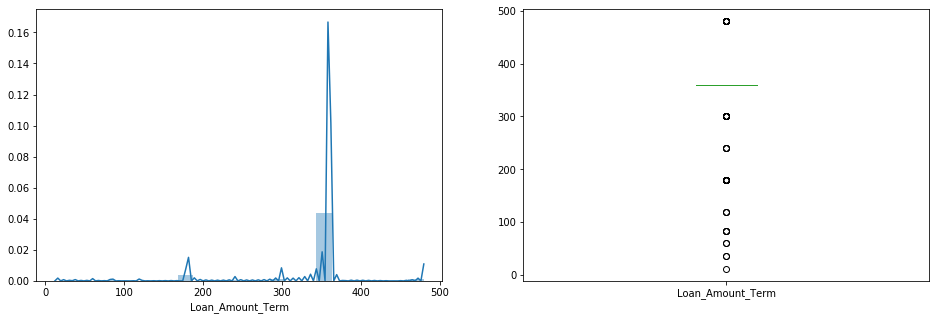

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["Loan_Amount_Term"]);

plt.subplot(122)
data["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

#### Observation :
We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

### Correlation among the features :

In [54]:
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

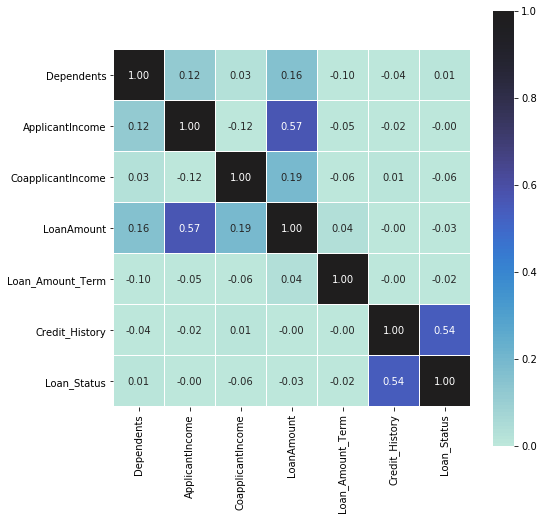

In [55]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, vmin=0,vmax=1, square=True, annot=True,center=True,fmt='.2f',linewidths=0.2)
plt.show()

#### Observation :
We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

Credit History will be mostly used to predict the Loan_Status since it is correlated with Loan_Status than all other features.

## Log Transformation :

### Loan Amount :

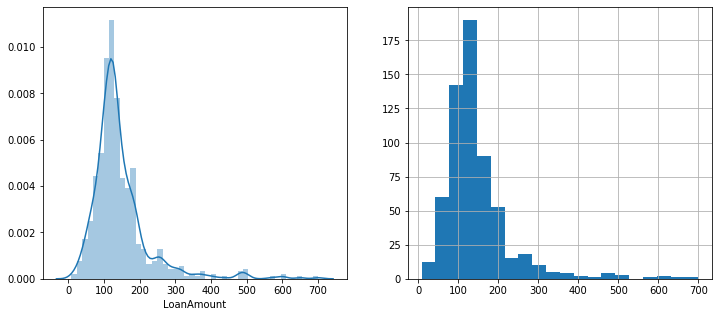

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["LoanAmount"])
plt.subplot(122)
data['LoanAmount'].hist(bins=20)
plt.show()

#### Observation :

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.



### Log Transfomation of Loan amount feature :

In [57]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

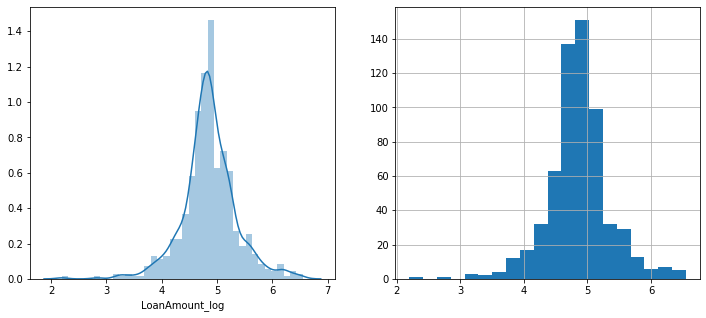

In [58]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["LoanAmount_log"])
plt.subplot(122)
data['LoanAmount_log'].hist(bins=20)
plt.show()

#### Observations :

Now,the data is transformed properpy and distribution looks like Normal distribution.

### Applicant Income :

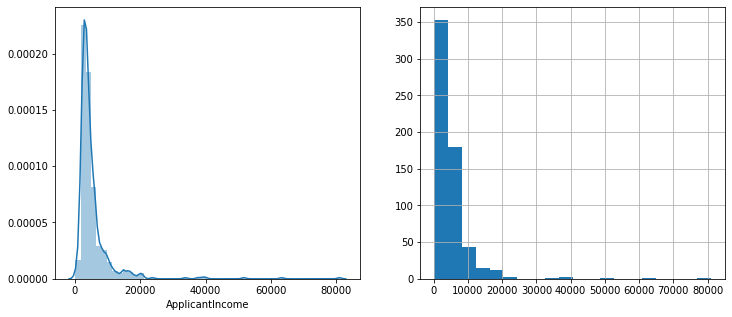

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])
plt.subplot(122)
data['ApplicantIncome'].hist(bins=20)
plt.show()

#### Observation :


Due to these outliers bulk of the data in the Applicant Income and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

### Log Transformation of Applicant Income :

In [62]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'])

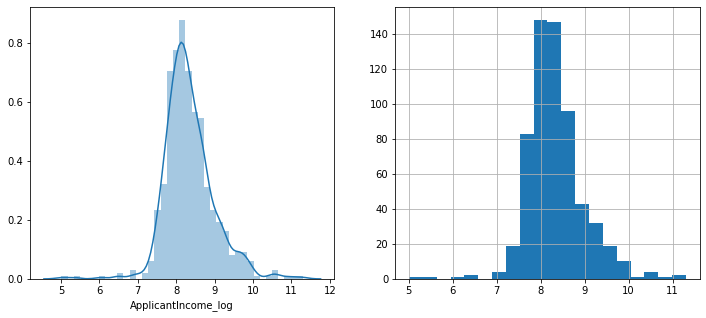

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["ApplicantIncome_log"])
plt.subplot(122)
data['ApplicantIncome_log'].hist(bins=20)
plt.show()

#### Observations :
Now,the data is transformed properpy and distribution looks like Normal distribution.

### Coapplicant Income :

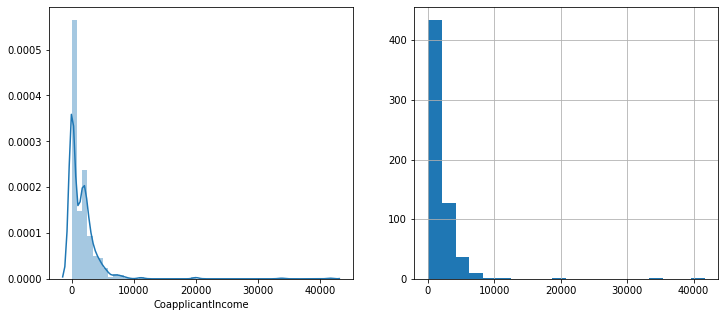

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])
plt.subplot(122)
data['CoapplicantIncome'].hist(bins=20)
plt.show()

#### Observation :
Due to these outliers bulk of the data in the CoApplicant Income and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

### Log Transformation of Applicant Income :

In [65]:
data['CoapplicantIncome'].dtype

dtype('int32')

In [66]:
data['CoapplicantIncome_log']=np.log(np.log(data['CoapplicantIncome']))

In [67]:
data['CoapplicantIncome_log'].isnull().sum()

273

In [68]:
data['CoapplicantIncome_log']=data['CoapplicantIncome_log'].fillna(data['CoapplicantIncome_log'].median())

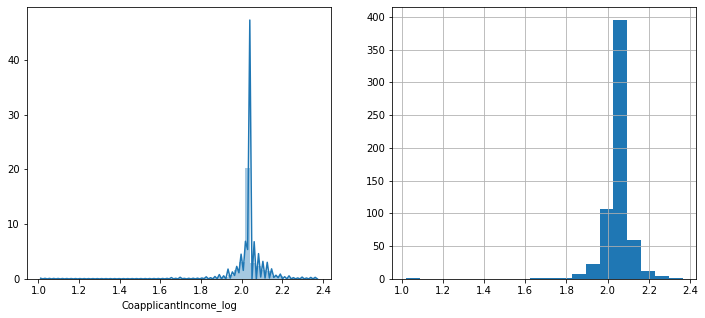

In [69]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["CoapplicantIncome_log"])
plt.subplot(122)
data['CoapplicantIncome_log'].hist(bins=20)
plt.show()

## Feature Engineering :

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

#### Total Income :

In [70]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [71]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,1,4.852030,8.674026,2.038703,5849
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,0,4.852030,8.430109,1.990411,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,1,4.189655,8.006368,2.038703,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,1,4.787492,7.856707,2.049700,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,1,4.948760,8.699515,2.038703,6000


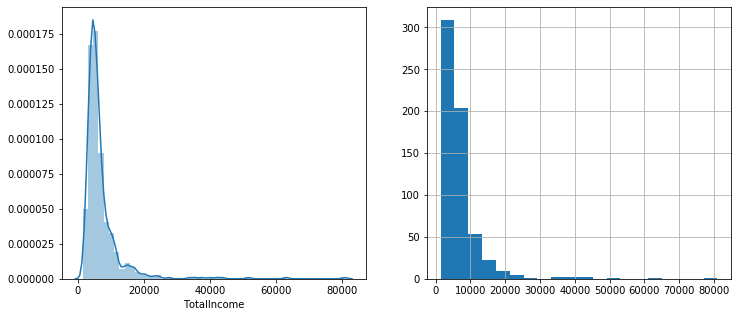

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["TotalIncome"])
plt.subplot(122)
data['TotalIncome'].hist(bins=20)
plt.show()

#### Observation :

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

### Log Transformation of Total Income :

In [73]:
data["TotalIncome_log"]=np.log(data["TotalIncome"])

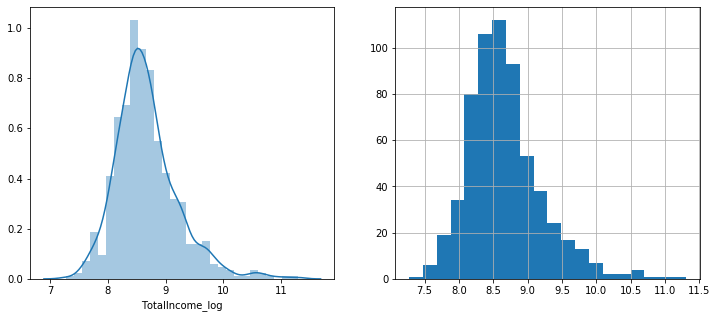

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["TotalIncome_log"])
plt.subplot(122)
data['TotalIncome_log'].hist(bins=20)
plt.show()

#### Observation :

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

#### EMI Feature :

In [75]:
data["EMI"]=data["LoanAmount"]/data["Loan_Amount_Term"]

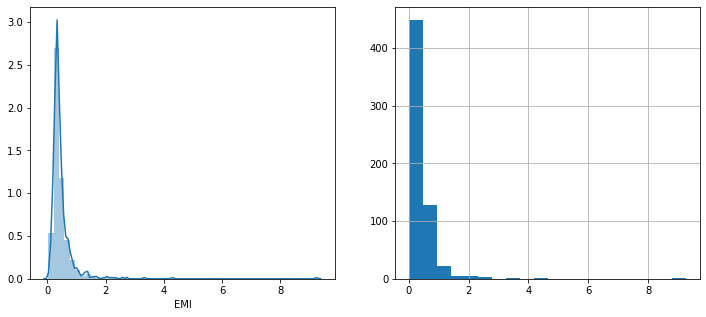

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["EMI"])
plt.subplot(122)
data['EMI'].hist(bins=20)
plt.show()

### Log Transformation of EMI

In [77]:
data["EMI_log"]=np.log(data["EMI"])

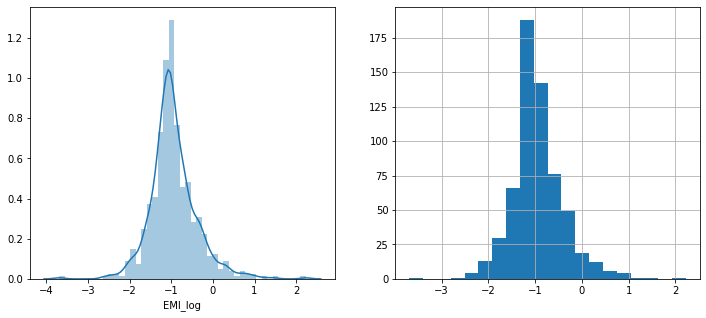

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["EMI_log"])
plt.subplot(122)
data['EMI_log'].hist(bins=20)
plt.show()

#### Observation :

Now,the data looks like Normal distribution.

### Balance Feature :

In [79]:
data["Balance_Income"] = data["TotalIncome"]-data["EMI"]*1000 # To make the units equal we multiply with 1000

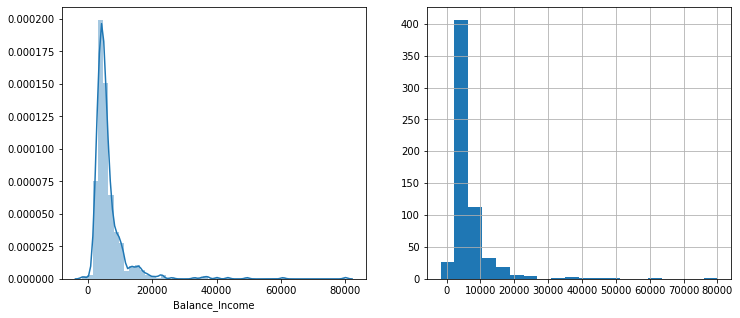

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["Balance_Income"])
plt.subplot(122)
data['Balance_Income'].hist(bins=20)
plt.show()

### Log Transformation of Balance Feature

In [81]:
data["Balance_Income_log"]=np.log(np.log(data["Balance_Income"]))

In [82]:
data['Balance_Income_log'].isnull().sum()

2

In [83]:
data['Balance_Income_log']=data['Balance_Income_log'].fillna(data['Balance_Income_log'].median())

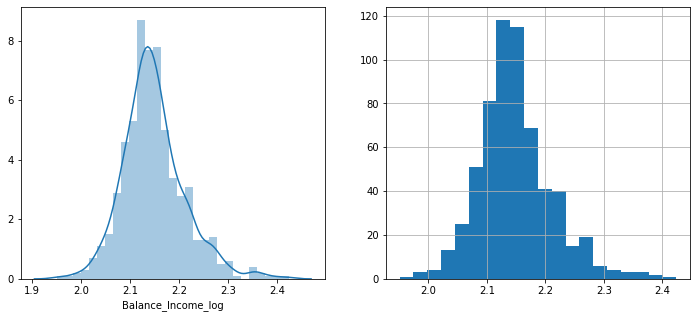

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["Balance_Income_log"])
plt.subplot(122)
data['Balance_Income_log'].hist(bins=20)
plt.show()

#### Observation :
Now,the data looks like Normal distribution.

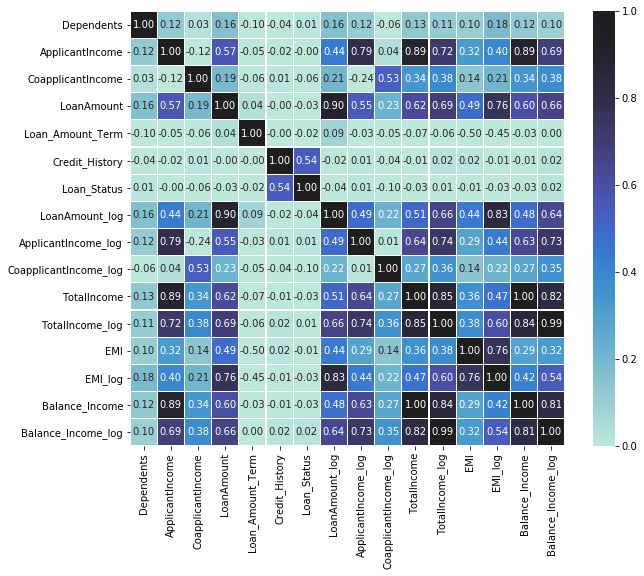

In [85]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, vmin=0,vmax=1, square=True, annot=True,center=True,fmt='.2f',linewidths=0.2)
plt.show()

#### Observation :

Credit history feature only has good correlation with Loan_Status.

## Model Building  with log features :

In [86]:
data1=data.copy()

In [87]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,...,1,4.852030,8.674026,2.038703,5849,8.674026,0.355556,-1.034074,5493.444444,2.153077
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,...,0,4.852030,8.430109,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,...,1,4.189655,8.006368,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,...,1,4.787492,7.856707,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,...,1,4.948760,8.699515,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


### Converting Categorical features into numeric :

In [88]:
data1['Gender']=data1['Gender'].map({'Male':1,'Female':0})
data1['Married']=data1['Married'].map({'Yes':1,'No':0})
data1['Education']=data1['Education'].map({'Graduate':1,'Not Graduate':0})
data1['Self_Employed']=data1['Self_Employed'].map({'Yes':1,'No':0})
data1['Property_Area']=data1['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})

In [89]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,1,0,0,1,0,5849,0,128.0,360,...,1,4.852030,8.674026,2.038703,5849,8.674026,0.355556,-1.034074,5493.444444,2.153077
1,LP001003,1,1,1,1,0,4583,1508,128.0,360,...,0,4.852030,8.430109,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,1,1,0,1,1,3000,0,66.0,360,...,1,4.189655,8.006368,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,1,1,0,0,0,2583,2358,120.0,360,...,1,4.787492,7.856707,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,1,0,0,1,0,6000,0,141.0,360,...,1,4.948760,8.699515,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


### Dopping unnecessary columns :

In [90]:
data1=data1.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','TotalIncome_log','EMI','EMI_log','Balance_Income','Balance_Income_log'],axis=1)

In [91]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,1,0,0,1,0,360,1,1,1,4.852030,8.674026,2.038703
1,1,1,1,1,0,360,1,2,0,4.852030,8.430109,1.990411
2,1,1,0,1,1,360,1,1,1,4.189655,8.006368,2.038703
3,1,1,0,0,0,360,1,1,1,4.787492,7.856707,2.049700
4,1,0,0,1,0,360,1,1,1,4.948760,8.699515,2.038703


In [92]:
data1.dtypes

Gender                     int64
Married                    int64
Dependents                 int32
Education                  int64
Self_Employed              int64
Loan_Amount_Term           int32
Credit_History             int32
Property_Area              int64
Loan_Status                int64
LoanAmount_log           float64
ApplicantIncome_log      float64
CoapplicantIncome_log    float64
dtype: object

###  Separating features and labels


In [93]:
X=data1.drop(['Loan_Status'],axis=1)
y=data1['Loan_Status']

### Splitting the data into Train and Test datasets

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)


In [95]:
# Shape of the Training and Test data

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 11) (491,)
Test set: (123, 11) (123,)


## Building KNN :

### Hyperparameter tuning using RandomizedSearchCv :

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors = list(range(1,31, 2))
clf=KNeighborsClassifier()
param_grid = {'n_neighbors': neighbors}
KNN_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=200,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
KNN_Randomecv=KNN_cv.fit(X_train,y_train)

In [98]:
KNN_Randomecv.best_params_

{'n_neighbors': 7}

### Standardizing the data :

In [99]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [100]:
KNN = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8207739307535642
The Test Accuracy is : 0.7723577235772358


### Plotting ROC Curvres :

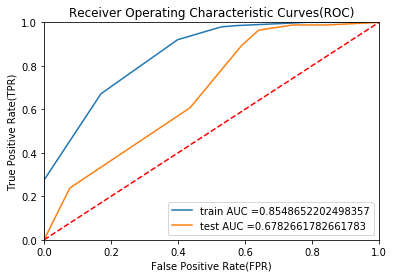

In [101]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrix

In [102]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

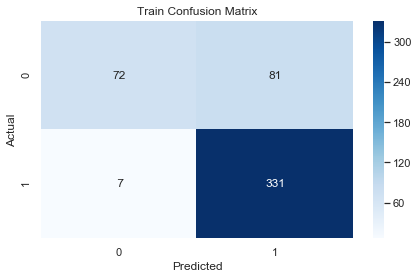

In [103]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

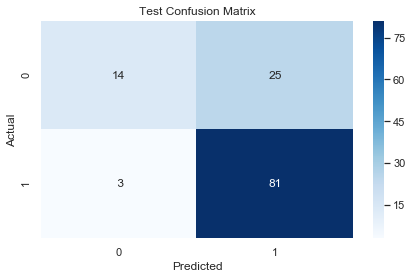

In [104]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Classification Report :

In [105]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classification report is :",Classificationreport_train)
print("Testing Classification reportt is :",Classificationreport_test)

Training Classification report is :               precision    recall  f1-score   support

           0       0.91      0.47      0.62       153
           1       0.80      0.98      0.88       338

    accuracy                           0.82       491
   macro avg       0.86      0.72      0.75       491
weighted avg       0.84      0.82      0.80       491

Testing Classification reportt is :               precision    recall  f1-score   support

           0       0.82      0.36      0.50        39
           1       0.76      0.96      0.85        84

    accuracy                           0.77       123
   macro avg       0.79      0.66      0.68       123
weighted avg       0.78      0.77      0.74       123



### Saving KNN model for future purpose :

In [106]:
from sklearn.externals import joblib
joblib.dump(KNN,'KNN.pkl',compress=3)

['KNN.pkl']

## Building Logistic Regression

### Hyperparameter tuning using Randomizedseachcv :

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters :

In [108]:
Log_Randomecv.best_params_

{'C': 0.01}

### Building Logistic Regression with best C value

In [109]:
log=LogisticRegression(C=0.01,penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8187372708757638
The Test Accuracy is : 0.7723577235772358


### Plotting ROC Curves :

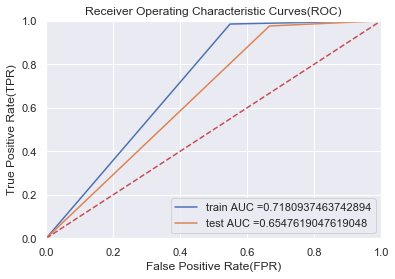

In [110]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices :

In [111]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

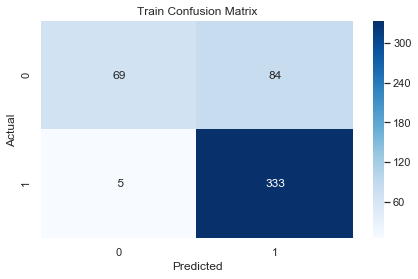

In [112]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

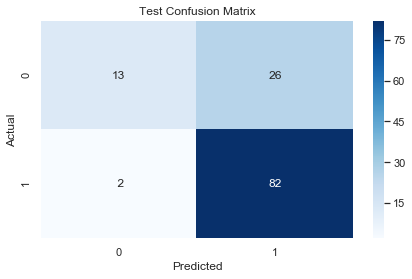

In [113]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Classification report :

In [114]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.93      0.45      0.61       153
           1       0.80      0.99      0.88       338

    accuracy                           0.82       491
   macro avg       0.87      0.72      0.75       491
weighted avg       0.84      0.82      0.80       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weighted avg       0.79      0.77      0.74       123



### Saving Logistic Regression model for future purpose :

In [115]:
joblib.dump(log,'Logistic_Regression.pkl',compress=3)

['Logistic_Regression.pkl']

## Building the model using Decision Tree

### Hyperparameter tuning using Randomizedcv :

In [116]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [117]:
# Estimator

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=4)

In [118]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=10,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=4,
            

#### Finding best parameters :

In [119]:
DT_RandomCV.best_params_

{'min_samples_split': 30, 'max_depth': 5, 'criterion': 'entropy'}

## Building Decision Tree model using best parameters

In [120]:
DT_clf=DecisionTreeClassifier(min_samples_split=30,max_depth=5,criterion='entropy',random_state=5,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.8370672097759674
The Test Accuracy is : 0.7398373983739838


### Plotiing ROC Curves :

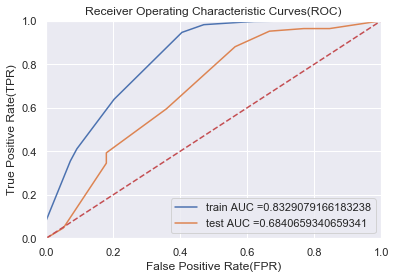

In [121]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices :

In [122]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

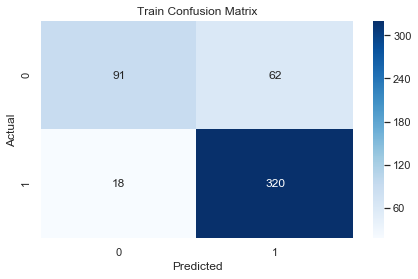

In [123]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

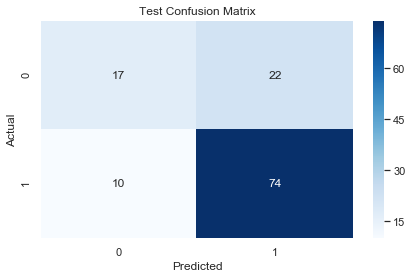

In [124]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Classification report :

In [125]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.83      0.59      0.69       153
           1       0.84      0.95      0.89       338

    accuracy                           0.84       491
   macro avg       0.84      0.77      0.79       491
weighted avg       0.84      0.84      0.83       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.63      0.44      0.52        39
           1       0.77      0.88      0.82        84

    accuracy                           0.74       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.73      0.74      0.72       123



###  Saving Decision Tree model for future purpose :

In [126]:
joblib.dump(DT_clf,'Decision_Tree.pkl',compress=3)

['Decision_Tree.pkl']

## Building Random Forest model

### Hyperparameter tuning using Randomizedsearchcv

In [127]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [128]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2,n_jobs=-1)

In [129]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=10,scoring='accuracy',n_jobs=-1,n_iter=100)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

#### Finding best parameters :

In [130]:
RF_RandomCV.best_params_

{'n_estimators': 200,
 'min_samples_split': 30,
 'max_depth': 30,
 'criterion': 'entropy'}

## Building Random Forest model using best parameters :

In [131]:
RF_clf=RandomForestClassifier(n_estimators=200,min_samples_split=30,max_depth=30,criterion='gini',random_state=3,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.8391038696537678
The Test Accuracy is : 0.7560975609756098


### Plotting ROC Curves :

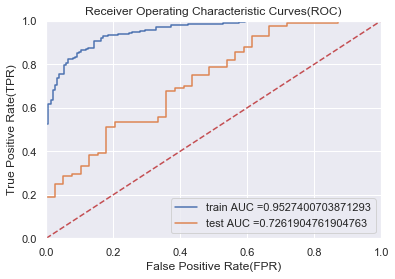

In [132]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices :

In [133]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

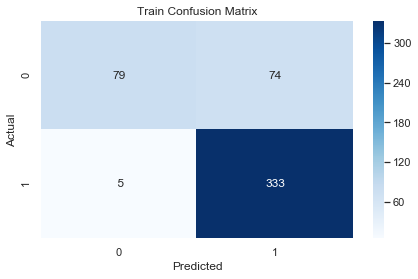

In [134]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

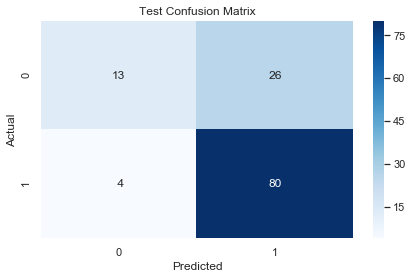

In [135]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

###  Classification report :

In [136]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.94      0.52      0.67       153
           1       0.82      0.99      0.89       338

    accuracy                           0.84       491
   macro avg       0.88      0.75      0.78       491
weighted avg       0.86      0.84      0.82       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.76      0.33      0.46        39
           1       0.75      0.95      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.72       123



### Saving Random Forest model for future purpose :

In [137]:
joblib.dump(RF_clf,'Random_Forest.pkl',compress=3)

['Random_Forest.pkl']

## Building XGBOOST Classifier

### Hyperparameter tuning

In [138]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[1, 5, 10, 50, 100, 200]
estimators=[50,70,90,110,130,150,170]
params_grid=dict(max_depth=depth,n_estimators=estimators)

In [139]:
# Estimator

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=5,n_jobs=-1)

In [140]:
# Building RandomizedsSearchCV

xgb_RandomCV=RandomizedSearchCV(xgb,params_grid,cv=5,scoring='accuracy',n_jobs=-1)
xgb_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=5, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='d

#### Finding best parameters :

In [141]:
xgb_RandomCV.best_params_

{'n_estimators': 70, 'max_depth': 1}

## Building Xgboost with best parameters

In [142]:
XGB=XGBClassifier(n_estimators=70,max_depth=1,random_state=6,n_jobs=-1)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

The Training Accuracy is : 0.8228105906313645
The Test Accuracy is : 0.7560975609756098


### Plotting ROC Curves :

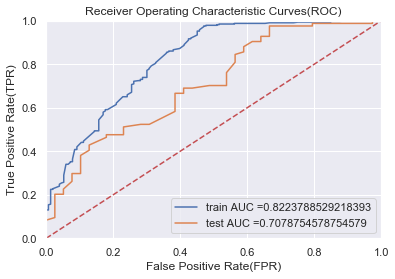

In [143]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  XGB.predict_proba(X_train)[:,1]
y_test_pred_proba=XGB.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Confusion Matrices :

In [144]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_XGBF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_XGB)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

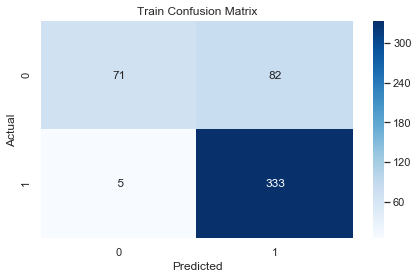

In [145]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

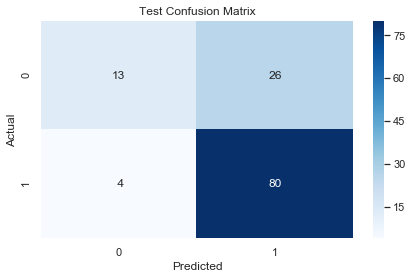

In [146]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Classification Report :

In [147]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_XGBF)
Classificationreport_test=classification_report(y_test,y_test_pred_XGB)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.93      0.46      0.62       153
           1       0.80      0.99      0.88       338

    accuracy                           0.82       491
   macro avg       0.87      0.72      0.75       491
weighted avg       0.84      0.82      0.80       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.76      0.33      0.46        39
           1       0.75      0.95      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.72       123



## Comparing the performance of models using Pretty Table

In [148]:
from prettytable import PrettyTable
x=PrettyTable()

In [149]:
x.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc']

In [151]:
x.add_row(['KNN',85.48,67.82,82.07,77.23])
x.add_row(['Logistic_Regression',71.80,65.47,81.87,77.23])
x.add_row(['Decision Tree',83.29,68.40,83.70,73.98])
x.add_row(['Random_Forest',5.27,72.61,83.91,75.60])
x.add_row(['Xgboost',82.23,70.78,82.28,75.60])

In [152]:
print(x)

+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |   85.48   |  67.82   |   82.07    |  77.23   |
| Logistic_Regression |    71.8   |  65.47   |   81.87    |  77.23   |
|    Decision Tree    |   83.29   |   68.4   |    83.7    |  73.98   |
|    Random_Forest    |    5.27   |  72.61   |   83.91    |   75.6   |
|       Xgboost       |   82.23   |  70.78   |   82.28    |   75.6   |
+---------------------+-----------+----------+------------+----------+


## Conclusion :

From the Pretty table,we can see <b>Logistic_Regression</b> and <b>KNN</b> have better results.